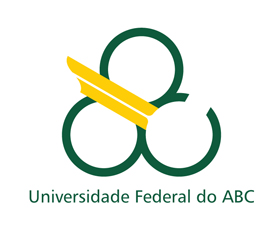
# <div style="text-align: center"> BC1419 - Calculo Numerico (2°2021) <br> Lista 2 - Grupo 1 Turma B2 </div>
<div style="text-align: center; font-size: 20px"> Prof.  Andre Pierro de Camargo </div><br>
<div style="text-align: center; font-size: 20px"> <p style="text-align: center">Alunos:</p><p style="margin-left: 25%">Alessandro Credidio Furlan - RA: 11201921322</p><p style="margin-left: 25%">Isadora Floriano Tacksian - RA: 11201920476</p><p style="margin-left: 25%">Murilo de Assis Cabral - RA: 11201921352</p><p style="margin-left: 25%">Vitor Hugo Tezotto Delquiaro - RA: 11201920871</p> </div>


# Exercício 1

Esse exercício visa resolver a seguinte equação diferencial:

$$
y''(x) = −\pi^2(\sin(\pi x) + \cos(\pi x)), −1 ≤ x ≤ 1, y(−1) = y(1) = −1
$$
    
Nele, será utilizado o método dos mínimos quadrados, com aproximação por combinações lineares dos polinômios de Legendre.

Primeiro, são importadas as bibliotecas e métodos necessários para a resolução desse exercício:

In [20]:
from math import factorial as fac
from math import sin, cos, pi, log10
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

Então, como $y''(x) = r(x)$, define-se $r(x) = −\pi^2(\sin(\pi x) + \cos(\pi x))$:

In [2]:
def r(x):
    return -pi**2*(sin(pi*x) + cos(pi*x))

## Tarefa 1
<br>
<div style="font-size: 16px; color: #0B0959">1 - (0.5) Para $k = 10$, calcule os polinômios de Legendre $P_0(x)$, $P_1(x)$, . . . , $P_{k−1}(x)$
no ponto $x = 0.7688$.</div>

Para esse cálculo, é utilizada a fórmula para obtenção de um polinômio de Legendre de índice $j$:

$$
P_{j} = \sum_{i=0}^{j} \binom{j }{i} \binom{j + i}{i}\left(\frac{x - 1}{2}\right)^i
$$

Primeiro, define-se a função que calcula o binomial $\binom{a}{b}$. Sabe-se que:

$$
\binom{a}{b} = \frac{a!}{b!(a-b)!}
$$

In [3]:
def binom(a, b):
    return fac(a)/(fac(b)*fac(a - b))

Então, define-se a função que devolve o valor do polinômio de Legendre de índice $j$ para um dado $x$. Nesse caso, o parâmetro `index` é igual a $j$.

In [4]:
def legendre_pol(index, x):
    return sum([binom(index, i)*binom(index+i, i)*((x - 1)/2)**i for i in range(index+1)])

Para o dado $x = 0.7688$, calcula-se o polinômio de Legendre $P_j$, para $0 ≤ j ≤ 9$:

In [5]:
x_given = 0.7688
for i in range(0, 10):
    print(f'P_{i} = {legendre_pol(i, x_given)}')

P_0 = 1.0
P_1 = 0.7688
P_2 = 0.38658016000000006
P_3 = -0.017195288319999863
P_4 = -0.3130696609057276
P_5 = -0.4194820888917828
P_6 = -0.3303546374685648
P_7 = -0.11211483648073199
P_8 = 0.1274467709980197
P_9 = 0.28473300112016964


## Tarefa 2
<br>
<div style="font-size: 16px; color: #0B0959">
Para $k ∈ {2, 3, 4, . . . , 30}$,    
<br>
1 - (1.0) Calcule os coeficientes de mınimos quadrados $α_1, α_2, . . . , α_k$ definidos por (6). Use a regra dos trapézios:
$$
 \int_{a}^{b} f(t) \,dt \approx T_m: = \frac{(b-a)}{2m}\left[ f(t_0) + \left(\sum_{i=1}^{m-1} 2f(t_i)\right) + f(t_m) \right]
$$
    
com $m = 10^4$ para calcular as integrais no lado direito de (6). Exiba os coeficientes $α_1, α_2, . . . , α_k$ para $k = 9$ com todos os dígitos disponíveis.
</div>

Primeiro, é definida a função da regra dos trapézios para aproximação de integrais definidas. Esta função recebe como parâmetro uma função genérica, $f(t)$, os limites, $a$ e $b$ e o número de divisões, $m$.

In [6]:
def integral_trapezoidal(f, a, b, m):
    coeficiente = float(b - a) / m
    somatorio = 0.0
    somatorio += f(a)/2.0
    for i in range(1, m):
        somatorio += f(a + i*coeficiente)
    somatorio += f(b)/2.0
    return somatorio * coeficiente

Então, é definido, primeiro, o intervalo da função, onde `initial` é $a$ e `final`, $b$:

In [7]:
initial = -1
final = 1

Agora, é definida a função que determina os coeficientes $\alpha_j$. Essa função leva em conta o cálculo direto de $\alpha_j$ dado por:

$$
\alpha_j = \frac{2j - 1}{2} \int_{-1}^{1} P_{j-1}r(x) \,dx
$$

Essa integral pode ser bem complicada. Então, utiliza-se o método dos trapézios para calculá-la. A função recebe o índice $k$ do $\alpha_k$ pretendido e o número $m$ de divisões que serão utilizadas no método dos trapézios.

In [8]:
def get_alfa(k, num_divs = 10000):
    return (2*k - 1)/2*integral_trapezoidal(lambda x: r(x)*legendre_pol(k-1, x), initial, final, num_divs)

Por fim, calcula-se $\alpha_k$ para $ 1 ≤ k ≤ 9$:

In [9]:
for i in range(1, 10):
    print(f'α_{i} = {get_alfa(i)}')

α_1 = 4.621192317699751e-16
α_2 = -9.424777650706595
α_3 = 15.000000493480254
α_4 = 11.431390197649232
α_5 = -5.748515581127785
α_6 = -2.1642999434215944
α_7 = 0.6525329066146618
α_8 = 0.16425414113053774
α_9 = -0.03549414764834449


<div style="font-size: 16px; color: #0B0959">
    2 - (1.0) Calcule a função $G_k$ definida em (7) para $k = 7$ nos pontos $x =
−1, −0.7, 0, 0.3, 1$.
</div>

A função $G_k$ depende de uma função $F(x)$, que por sua vez depende da função $f^{*}(x)$ da seguinte forma:

$$
    F''(x) = f^{*}(x) = \sum_{j=1}^{k} \alpha_j f_j(x)
$$

Lembrando que a função $f_j(x)$ é apenas o polinômio de Legendre de índice $j-1$, é possível calcular a função $F(x)$ integrando duas vezes em $x$ a função $f^{*}(x)$ e ignorando as constantes de integração:

$$
    F(x) = \iint f^{*}(x) \,dx\,dx = \sum_{j=1}^{k} \alpha_j \iint f_j(x) \,dx\,dx = \sum_{j=1}^{k} \alpha_j \iint P_{j-1}(x) \,dx\,dx
$$

A integral dupla em x do polinômio de Legendre de índice $j$ é dada por:

$$
\iint P_{j}(x) \,dx\,dx = \iint \sum_{i=0}^{j} \binom{j }{i} \binom{j + i}{i}\left(\frac{x - 1}{2}\right)^i  \,dx\,dx = \sum_{i=0}^{j} \binom{j }{i} \binom{j + i}{i}\frac{4}{(i+1)(i+2)}\left(\frac{x - 1}{2}\right)^{i+2}
$$

Então, define-se a função `legendre_duas_integrais`, que devolve a integral dupla (ignorando as constantes de integração) do polinômio de Legendre de índice igual a `index` para um dado $x$:

In [10]:
def legendre_duas_integrais(index, x):
    return sum([binom(index, i)*binom(index+i, i)*((x - 1)/2)**(i + 2)*4/((i+1)*(i+2)) for i in range(index+1)])

Com essa integral já definida, é possível definir a função que devolve o valor de $F(x)$ para um determinado índice $k$ e um valor $x$. Para ela, é utilizada a seguinte relação:

$$
F(x) = \sum_{j=1}^{k} \alpha_j \sum_{i=0}^{j} \binom{j }{i} \binom{j + i}{i}\frac{4}{(i+1)(i+2)}\left(\frac{x - 1}{2}\right)^{i+2}
$$


In [11]:
def F_grande(x, k):
    return sum([get_alfa(i)*legendre_duas_integrais(i-1, x) for i in range(1,k+1)])

Com $F(x)$ definida, define-se $G_k(x)$ a partir da seguinte relação:

$$
G_k(x) = F(x) + (-1 - F(-1))\frac{1 - x}{2} + (-1 - F(1))\frac{x + 1}{2}
$$

OBS: o índice $k$ já está implícito em $F(x)$.

In [12]:
def G_k(x, k):
    return F_grande(x, k) + (-1 - F_grande(-1, k))*(1 - x)/2 + (-1 - F_grande(1, k))*(x + 1)/2

Para fins de verificação, calcula-se $G_4(x)$ para os pontos dados pelo enunciado:

In [13]:
for i in [-1, -.7, 0, .3, 1]:
    print(f'G_4({i}) = {G_k(i, 4)}')

G_4(-1) = -1.0
G_4(-0.7) = -1.3332509058335167
G_4(0) = 0.8750000616850317
G_4(0.3) = 1.336502467538775
G_4(1) = -1.0


Por fim, como pedido, calcula-se $G_7(x)$ para os pontos dados pelo enunciado:

In [14]:
for i in [-1, -.7, 0, .3, 1]:
    print(f'G_7({i}) = {G_k(i, 7)}')

G_7(-1) = -1.0
G_7(-0.7) = -1.3972325326982244
G_7(0) = 0.9998587162914496
G_7(0.3) = 1.3962393621197444
G_7(1) = -1.0


<div style="font-size: 16px; color: #0B0959">
3 - (1.5) Calcule o erro máximo (em valor absoluto).
$$
 E_{m,k} = \max |y(x) - G_k(x)|, x \in [-1, 1]
$$
    
onde $y(x) = \sin(\pi x) + cos(\pi x)$ é a solução exata da equação diferencial (8) e $G_k$ é a aproximação definida por (7). Em geral, é difícil determinar o valor exato da expressão que aparece no lado direito de (9). Para estimar esse valor, calcule o erro $|y(x) − Gk(x)|$ fazendo $x$ percorrer uma malha de pontos igualmente espaçados em $[−1, 1]$ com $10117$ subintervalos e guarde o maior valor encontrado. Exiba os erros (9) para
$k = 2, 3, . . . , 30$.
</div>

Primeiro, define-se os $k$s mínimo e máximo:

In [15]:
k_max_erro = 30
k_min_erro = 2

Como, a operação de calcular os coeficientes $\alpha$ é bem custosa, calcula-se os coeficientes de 1 a 30 num vetor, tanto para $m=10^4$ quanto para $m=10^5$.

In [16]:
alfas = {
    'trapezoidal': {
        'm10^4': np.array([get_alfa(i) for i in range(1, k_max_erro+2)]),
        'm10^5': np.array([get_alfa(i, 100000) for i in range(1, k_max_erro+2)])
    }
}

Então, cria-se um vetor com os valores de $x$ de -1 a 1 espaçados igualmente entre si.

In [17]:
num_subintervalos = 10117
subintervalos_x = np.array([initial + i*(final - initial)/num_subintervalos for i in range(num_subintervalos+1)])

Para efeitos de comparação com $G_k$, são calculados os valores exatos de $y(x)$ para todo $x$ dos subintervalos.

In [18]:
y_of_x_exato = np.sin(np.pi*subintervalos_x) + np.cos(np.pi*subintervalos_x)

Novamente, é calculada a função $F(x)$. Dessa vez, ela é feita de maneira mais otimizada, de maneira vetorizada. Assim, os coeficientes são calculados apenas uma vez.

In [19]:
def F_grande_otimizado(x, k, alfa_vec):
    ints_legendre = np.array([legendre_duas_integrais(i-1, x) for i in range(1,k+1)])
    return np.sum(alfa_vec[:k]*ints_legendre)

A função $G_k$ também é otimizada apenas chamando `F_grande_otimizado` ao invés de `F_grande`.

In [20]:
def G_k_otimizado(x, k, alfa_vec):
    return F_grande_otimizado(x, k, alfa_vec) + (-1 - F_grande_otimizado(-1, k, alfa_vec))*(1 - x)/2 + (-1 - F_grande_otimizado(1, k, alfa_vec))*(x + 1)/2

Após isso, é criada a variável `erros_m_k` guardar os valores de $E_{m,k}$ para cada caso do problema e facilitar análises futuras.

In [21]:
erros_m_k = {
    "trapezio": {
        "m10^4": [],
        "m10^5": [],
    },
    "simpson": {
        "m10^5": []
    }
}

Abaixo são calculados os erros subtraindo elemento a elemento dos vetores e encontrando o maior valor absoluto. Nesse caso, são calculados os $E_{m,k}$ para o método do trapézio, com $m=10^4$ e $k$ de 2 a 30.

In [22]:
# trapezoidal para m = 10^4
for k in range(k_min_erro, k_max_erro+1):
    G_k = np.array([G_k_otimizado(i, k+1, alfas['trapezoidal']['m10^4']) for i in subintervalos_x])
    erros_m_k['trapezio']['m10^4'].append({'k': k, 'erro': max(np.abs(y_of_x_exato - G_k))})
    print(f'E_{k} = {max(np.abs(y_of_x_exato - G_k))}')

E_2 = 0.46592651878431646
E_3 = 0.12912437628181284
E_4 = 0.026908477291985977
E_5 = 0.0053396843246762415
E_6 = 0.0009090280624887148
E_7 = 0.00014303110784186224
E_8 = 2.0263925892660684e-05
E_9 = 2.6573173446120535e-06
E_10 = 3.5305506806970754e-07
E_11 = 6.40173428712032e-08
E_12 = 8.180755894926506e-08
E_13 = 8.179986776823966e-08
E_14 = 8.54146604556405e-08
E_15 = 8.54125279392548e-08
E_16 = 9.163093039887826e-08
E_17 = 1.1664459220739332e-07
E_18 = 1.47313724996323e-07
E_19 = 3.7749982473300747e-07
E_20 = 3.286126595281047e-06
E_21 = 7.948200134277883e-06
E_22 = 0.0010756382054251112
E_23 = 0.01409043708730029
E_24 = 22.155256507026994
E_25 = 570.2819041079003
E_26 = 35359.7727102387
E_27 = 406602.79273860244
E_28 = 24181296.86367686
E_29 = 636142829.7145782
E_30 = 30688537033.548386


## Tarefa 3
<br>
<div style="font-size: 16px; color: #0B0959">
Para $k ∈ {2, 3, 4, . . . , 30}$,    
<br>
1 - (0.5) Recalcule os erros (9) da Tarefa 2, mas agora use $m = 10^{5}$ para a regra dos trapézios.
</div>

Nesse exercício segue-se os mesmos passos da Tarefa anterior, porém alterando o $m$ de $10^{4}$ para $10^{5}$.
Assim, usa-se os mesmos $k$ de 2 a 30 para calcular a função $G_{k}$, exibidos a seguir:

In [23]:
# trapezoidal para m = 10^5
for k in range(k_min_erro, k_max_erro+1):
    G_k = np.array([G_k_otimizado(i, k+1, alfas['trapezoidal']['m10^5']) for i in subintervalos_x])
    erros_m_k['trapezio']['m10^5'].append({'k': k, 'erro': max(np.abs(y_of_x_exato - G_k))})
    print(f'E_{k} = {max(np.abs(y_of_x_exato - G_k))}')

E_2 = 0.4659264645443688
E_3 = 0.12912443912721372
E_4 = 0.026908451108702436
E_5 = 0.005339683753535329
E_6 = 0.0009089939546561565
E_7 = 0.00014310075977785885
E_8 = 2.0230785041652766e-05
E_9 = 2.6488828452908564e-06
E_10 = 3.1898339586389213e-07
E_11 = 3.49643187735893e-08
E_12 = 4.117247875967678e-09
E_13 = 1.1713252590084267e-09
E_14 = 9.251731603043822e-10
E_15 = 9.236468256901276e-10
E_16 = 2.084169503646649e-09
E_17 = 5.393984925383677e-09
E_18 = 3.455412822539472e-08
E_19 = 1.469955737132267e-07
E_20 = 4.06282236742328e-07
E_21 = 3.1406752970752905e-05
E_22 = 0.00019478657379212727
E_23 = 0.02336954546584491
E_24 = 20.296164466740635
E_25 = 558.2423751785165
E_26 = 35898.25891033959
E_27 = 471753.4791561888
E_28 = 22986211.804461557
E_29 = 578430699.5353423
E_30 = 32100853193.84539


<br>
<div style="font-size: 16px; color: #0B0959">    
<br>
2 - (1.0) Recalcule os erros (9) da Tarefa 2, mas agora use a regra de
Simpson
$$
 \int_{a}^{b} f(t) \,dt \approx S_m: = \frac{(b-a)}{3m}\left[ f(t_0) + \left(4f(t_1) + 2f(t_2) + 4f(t_3) + 2f(t_4) + ...]  + [4f(t_{m-1})\right) + f(t_m) \right]
$$
    
com $m = 10^5$ para calcular os coeficientes do item 1 da tarefa 2.
</div>
A seguir a regra de Simpson é definida, considerando seus limites e a função f já definida como $r(x)*legendrepol(k-1, x)$. Para a regra de Simpson utiliza-se a somatória dos termos com índice par multiplicados por 2 e os de índice ímpar multiplicados por 4, exceto os extremos $t_{0}$ e $t_{m} $ que são multiplicados por 1.

In [24]:
def simpson(f, a, b, n):
    h = float(b - a) / n
    s = 0.0
    s += f(a)/3.0
    for i in range(1, n, 2):
        s += (4/3)*f(a + i*h)
    for i in range(2, n, 2):
        s += (2/3)*f(a + i*h)
    s += f(b)/3.0
    return s * h

A seguir define-se a função para se determinar os coeficientes $α_1, α_2, . . . , α_k$ sendo $k = 30$ e x entre -1 e 1 com 10117 subdivisões

In [25]:
def get_alfa_simpson(k, num_divs = 100000):
    return (2*k - 1)/2*simpson(lambda x: r(x)*legendre_pol(k-1, x), initial, final, num_divs)

In [26]:
alfas['simpson'] = {'m10^5': np.array([get_alfa_simpson(i) for i in range(1, k_max_erro+2)])}

Calculando o valor dos erros pela regra de Simpson com $m = 10^{5}$, temos:

In [27]:
# simpson para m = 10^5
for k in range(k_min_erro, k_max_erro+1):
    G_k = np.array([G_k_otimizado(i, k+1, alfas['simpson']['m10^5']) for i in subintervalos_x])
    erros_m_k['simpson']['m10^5'].append({'k': k, 'erro': max(np.abs(y_of_x_exato - G_k))})
    print(f'E_{k} = {max(np.abs(y_of_x_exato - G_k))}')

E_2 = 0.4659264639964724
E_3 = 0.12912443976203702
E_4 = 0.026908450844204235
E_5 = 0.005339683747789259
E_6 = 0.0009089936101108753
E_7 = 0.00014310146335549945
E_8 = 2.023045039911686e-05
E_9 = 2.6487976720890316e-06
E_10 = 3.186699403245896e-07
E_11 = 3.57451670485176e-08
E_12 = 3.736309150959016e-09
E_13 = 3.710391993649864e-10
E_14 = 7.363731846510291e-11
E_15 = 7.241496291499061e-11
E_16 = 2.7530165924716243e-09
E_17 = 4.417372301279698e-09
E_18 = 4.106883810806039e-08
E_19 = 1.3575225277229208e-07
E_20 = 3.705187689995171e-07
E_21 = 2.773243848164242e-05
E_22 = 0.00015433118016772163
E_23 = 0.01834236333715933
E_24 = 20.662625710410477
E_25 = 553.7962969555015
E_26 = 35938.55778544909
E_27 = 479080.26249013096
E_28 = 22791220.80856805
E_29 = 573551310.3579627
E_30 = 32399766647.171005


<br>
<div style="font-size: 16px; color: #0B0959">    
<br>3 - (1.0) Plote os valores calculados $(k, log(Em,k)), k = 2, 3, . . . , 30$, para a regra dos trapézios ($m = 10^{4}$ e $m = 10^{5}$) e para a regra de Simpson ($m = 10^{5}$) em um mesmo gráfico. Observe que, nesse caso, o fator
limitante para o erro de aproximação é a precisão no cálculo das integrais (6). Qual regra de integração se mostrou mais eficiente nesse caso?
</div>

A regra de integração que se mostrou mais eficiente foi a de Simpson, visto que quanto menor o erro, menor seu logaritmo. Assim, pelo gráfico, é possível perceber que na região de $k = 15$ até $k=20$ a regra de Simpson retorna erros menores (seu logaritmo é menor), sendo, portanto, mais eficiente.

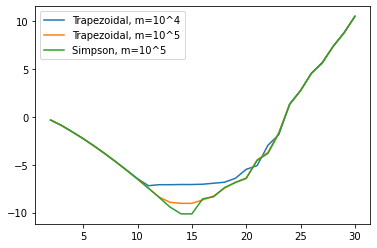

In [17]:
ks = list(map(lambda x: x.get('k'), erros_m_k['trapezio']['m10^4']))
erros_trap_10_4 = list(map(lambda x: log10(x.get('erro')), erros_m_k['trapezio']['m10^4']))
erros_trap_10_5 = list(map(lambda x: log10(x.get('erro')), erros_m_k['trapezio']['m10^5']))
erros_simp_10_5 = list(map(lambda x: log10(x.get('erro')), erros_m_k['simpson']['m10^5']))
plt.plot(ks,erros_trap_10_4, label='Trapezoidal, m=10^4') 
plt.plot(ks,erros_trap_10_5, label='Trapezoidal, m=10^5') 
plt.plot(ks,erros_simp_10_5, label='Simpson, m=10^5') 
plt.legend()
plt.show()

In [3]:
erros_m_k 

{'trapezio': {'m10^4': [{'k': 2, 'erro': 0.46592651878431646},
   {'k': 3, 'erro': 0.12912437628181284},
   {'k': 4, 'erro': 0.026908477291985977},
   {'k': 5, 'erro': 0.0053396843246762415},
   {'k': 6, 'erro': 0.0009090280624887148},
   {'k': 7, 'erro': 0.00014303110784186224},
   {'k': 8, 'erro': 2.0263925892660684e-05},
   {'k': 9, 'erro': 2.6573173446120535e-06},
   {'k': 10, 'erro': 3.5305506806970754e-07},
   {'k': 11, 'erro': 6.40173428712032e-08},
   {'k': 12, 'erro': 8.180755894926506e-08},
   {'k': 13, 'erro': 8.179986776823966e-08},
   {'k': 14, 'erro': 8.54146604556405e-08},
   {'k': 15, 'erro': 8.54125279392548e-08},
   {'k': 16, 'erro': 9.163093039887826e-08},
   {'k': 17, 'erro': 1.1664459220739332e-07},
   {'k': 18, 'erro': 1.47313724996323e-07},
   {'k': 19, 'erro': 3.7749982473300747e-07},
   {'k': 20, 'erro': 3.286126595281047e-06},
   {'k': 21, 'erro': 7.948200134277883e-06},
   {'k': 22, 'erro': 0.0010756382054251112},
   {'k': 23, 'erro': 0.01409043708730029},
  

## Tarefa 4
<br>
<div style="font-size: 16px; color: #0B0959">
Ajuste os dados $(k, log(Em,k))$, $k = 2, 3, . . . , 16$ calculados na Tarefa anterior com a regra de Simpson (só até k = 16) por uma função quadrática   
$$
    f(x) = α_{1}f_{1}(x) + α_{2}f_{2}(x) + α_{3}f_{3}(x)
$$
$f_{1}(x) = 1; f_{2}(x) = x; f_{3}(x) = x^{2}$, pelo método dos mínimos quadrados discreto.
    
__Lembrete:__ Os coeficientes de mínimos quadrados (α_1, α_2, α_3) são a solução do sistema de equações
    
\begin{equation}
\begin{bmatrix} \langle f_1, f_1 \rangle &\langle f_1, f_2 \rangle  & \langle f_1, f_3 \rangle \\ \langle f_2, f_1 \rangle & \langle f_2, f_2 \rangle & \langle f_2, f_3 \rangle \\ \langle f_3, f_1 \rangle & \langle f_3, f_2 \rangle & \langle f_3, f_3 \rangle \end{bmatrix} \bullet \begin{bmatrix} \alpha_1 \\ \alpha_2 \\ \alpha_3 \end{bmatrix} = \begin{bmatrix} \langle f_1, y \rangle \\ \langle f_2, y \rangle \\ \langle f_3, y \rangle \end{bmatrix} \space \space (11)
\end{equation}
    
com $x_k = k$, $y_k = log (E_m,_k)$, $k = 2,3,...,16$ e
    
$$
\langle f_i, f_j \rangle = \sum_{k=2}^{16} f_i(x_k)f_j(x_k) \space \space \space  \langle f_i, y \rangle = \sum_{k=2}^{16} f_i(x_k)y_k \space \space \space \space (12)
$$

<br>
$1 - (0.5)$ Exiba a matriz e o vetor de termos independentes do sistema $(11)$
calculados numericamente.

</div>


Definindo as funções $f_1(x) = 1$, $f_2(x) = x$ e $f_3(x)= x^2$, temos:

In [ ]:
efes = {
    '1': lambda x: np.array([1 for i in range(2, 17)]),
    '2': lambda x: x,
    '3': lambda x: x**2,
    'y': lambda x: yks
}

Obtendo os valores de $\langle f_i, f_j \rangle$ obtemos:

In [9]:
def produto_interno_efes(i, j):
    xks = np.array([k for k in range(2, 17)])
    fis = efes[str(i)](xks)
    fjs = efes[str(j)](xks)
    return np.sum(fis*fjs)

Obtendo os valores de $\langle f_i, y \rangle$ obtemos:

In [22]:
yks = np.array(list(map(lambda x: log10(x.get('erro')), erros_m_k['simpson']['m10^5'])))[:15]

Assim, temos que a matriz dos coeficientes é:

In [25]:
matriz_coefs = []

for i in range(1, 4):
    linha = np.array([produto_interno_efes(i, j) for j in range(1, 4)])
    matriz_coefs.append(linha)
    
matriz_coefs = np.array(matriz_coefs)
matriz_coefs

array([[    15,    135,   1495],
       [   135,   1495,  18495],
       [  1495,  18495, 243847]])

A partir da equação $(11)$, temos que a matriz dos resultados é:

In [12]:
matriz_resultados = []

for i in range(1, 4):
    matriz_resultados.append(produto_interno_efes(i, 'y'))
    
matriz_resultados = np.array(matriz_resultados)
matriz_resultados

array([   -82.85485456,   -955.41254037, -11958.33474278])

<br>
<div style="font-size: 16px; color: #0B0959">
$2.\space (1.0)$ Exiba a solução do sistema obtida computacionamente com $TODOS$ os digitos da máquina utilizada.

__Observação:__ O sistema $(11)$ deve ser resolvido computacionalmente,
utilizando o m ́etodo da

In [14]:
# Função que executa o método da Eliminação de Gauss para um sistema genérico
def EliminacaoDeGauss(coeff, resultado):    
    
    # Checa se o sistema não tem mais     
    m, n = coeff.shape 
    if ( m < n ):
        print("Não há soluções únicas")
    else:
        
        # Matriz auxiliar de 0s para construção de matriz escalonada        
        l = np.zeros((n,n))
        
        # Checa se há algum 0 na diagonal da matriz de coeficientesz        
        for i in range(n):
            if (coeff[i][i] == 0):
                print("Sistema impossível")
        
        # Iteração para aplicação do método        
        for k in range(n - 1):         
            for i in range(k + 1, n):
                # Razão entre os coeficientes                
                l[i][k] = coeff[i][k] / coeff[k][k]         
                for j in range(m):
                    # Coeficiente para eliminar a linha                     
                    coeff[i][j] = coeff[i][j] - l[i][k] * coeff[k][j]
                # Mesma soma no vetor de termos independentes                
                resultado[i] = resultado[i] - l[i][k] * resultado[k]
        
        # Vetor de soluções a ser preenchido                  
        x = np.zeros(n)                                            
        x[n - 1] = resultado[n - 1] / coeff[n - 1][n - 1]  

        # Preenchimento dos resultados de trás para frente (Somando os resultados anteriores)
        for i in range(n - 2, -1, -1):             
            for j in range(i + 1, n):
                resultado[i] -= coeff[i][j] * x[j] 
            x[i] = resultado[i] / coeff[i][i]
            
        return x
    


In [15]:
result_alfa = EliminacaoDeGauss(matriz_coefs, matriz_resultados)
for i in range(1,4):
    print(f'α_{i} = {result_alfa[i-1]}')

α_1 = 2.342656421438763
α_2 = -1.073963379420465
α_3 = 0.01805374938983666


<br>
<div style="font-size: 16px; color: #0B0959">
$3.\space(0.5)$ Faça um gráfico com os dados amostrais utilizados e a função de mínimos quadrados obtida (plotar os dois juntos).

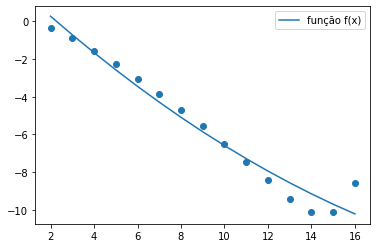

In [22]:
funcao = [result_alfa[0] + result_alfa[1]*x + result_alfa[2]*x**2 for x in ks[:15]]
plt.plot(ks[:15],funcao, label='função f(x)') 
plt.scatter(ks[:15], erros_simp_10_5[:15])
plt.legend()
plt.show()

# Exercício 2

<br>
<div style="font-size: 16px; color: #0B0959">

1. (1.0) Calcule os polinômios $ p_x(t), p_y(t), p_z(t) $ nos pontos $ t_j^* := j/50, j = 0, 1, ..., 50$. Mostre os valores calculados em uma tabela.
</div>

Primeiro, foi definido as listas de $ x_i, y_i, z_i $ e um data frame para melhor vizualização

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#definicao do conjunto de dados 
t = [0.000, 0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875, 1.000]
x = [0.7416, 0.2685, 0.3333, 0.3982, -0.0749, -0.3089, 0.3333, 0.9756, 0.7416]
y = [0.7416, 0.9756, 0.3333, -0.3089, -0.0749, 0.3982, 0.3333, 0.2685, 0.7416]
z = [-0.4832, -0.2441, 0.3334, 0.9107, 1.1498, 0.9107, 0.3334, -0.2441, -0.4832]

#construção do data frame com o conjunto de dados
dados = pd.DataFrame([t, x, y, z]).set_index([['t', 'x', 'y', 'z']])
dados

,0,1,2,3,4,5,6,7,8
t,0.0000,0.1250,0.2500,0.3750,0.5000,0.6250,0.7500,0.8750,1.0000
x,0.7416,0.2685,0.3333,0.3982,-0.0749,-0.3089,0.3333,0.9756,0.7416
y,0.7416,0.9756,0.3333,-0.3089,-0.0749,0.3982,0.3333,0.2685,0.7416
z,-0.4832,-0.2441,0.3334,0.9107,1.1498,0.9107,0.3334,-0.2441,-0.4832


### Método de Newton de Interpolação

De acordo com o método de Newton, existe um polinômio $P(x)$ que interpola um conjunto de dados, tal que: $$ P(x) = \alpha_0 + \alpha_1(x-x_0) + \alpha_2(x-x_0)(x-x_1) + ... + \alpha_n(x-x_0)(x-x_1)...(x-x_n) \space\space\space     (1)$$


Os coeficientes de $P(x)$, $\alpha_0, \alpha_1, ..., \alpha_n$ são obtidos por meio das diferenças divididas de ordem k, as quais são definidas por: $$ f[x_0, ..., x_k] := \frac{f[x_1, ..., x_k] - f[x_0, ..., x_k-1]}{x_k - x_0} \space\space\space (2)   $$

Dessa forma têm-se que, por exemplo: $$ f[x_2, x_1, x_0] = \frac{\frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0}}{x_2-x_0} =\frac{f[x_2, x_1]-f[x_1, x_0]}{x_2-x_1}  \space\space\space     (3)$$

Assim, é possível construir $f[x_2, x_1, x_0]$ por meio de $f[x_2, x_1]$ e $f[x_1, x_0]$. 

Definindo uma matriz quadrada $M_{n,n}$, sendo $n$ o número de pontos a serem interpolados, e preenchendo a primeira coluna com os pontos de um conjunto de dados $d(x)$, contendo n elementos, é possível encontrar as diferenças divididas de Newton a partir dos elementos adjacentes um dos outros junto ao conjunto x de dados. Para um conjunto 4 elementos, por exemplo, temos:

$$M_{4,4} = \space\space \begin{matrix} 
y_0 & f[x_1, x_0] & f[x_2, x_1, x_0] & f[x_3, x_2, x_1, x_0]\\
y_1 & f[x_2, x_1] & f[x_3, x_2, x_1] & 0 \\
y_2 & f[x_3, x_2] & 0 & 0\\
y_3 & 0 & 0 & 0
\end{matrix}$$

A partir dessa matriz, podemos extrapolar o procedimento para uma amostra de dados de n elementos e, com ela, os coeficietes da expressão (1) são obtidos. Na matriz $M_{n,n}$ os coeficientes $\alpha_0, \alpha_1, ..., \alpha_n$ são os números da primeira linha, tal que $\alpha_0 = M_{0,1}$ - vale notar que $\alpha_0 = d(0) $, o que ocorre quando $x=0$, assim, os coeficientes fazem sentido, pois $P(0)$ deve ser igual a $d_0$.

### Definição da Função coef_interpolacao

A função <em>coef_interpolacao</em> cria a matriz $M_{n, n}$  para um conjunto de dados independentes $a$ e dependentes $b$, tal que $b(a)$. No caso do problema, têm-se que $a = t_i$ e $b = x_i, y_i$ ou $z_i$.

In [4]:
def coef_interpolacao(a, b):
    #criacao da matriz de zeros a ser preenchida
    n = len(a)
    matriz = np.zeros([n, n])
    #primeira coluna são os termos juntos ao x^0
    matriz[:,0] = b

    #metodo das diferenciais de newton
    for c in range(1, n):
        for l in range(n-c):
            matriz[l][c] = (matriz[l+1][c-1] - matriz[l][c-1]) / (a[l+c] - a[l])

    #primeira linha da matriz representa os coeficientes em ordem 
    coef = matriz[0]
    return matriz

Na saída a seguir, é possível ver a matriz gerada pela função <em>coef_interpolacao</em> para $a = t_i$ e $b = x_i$

In [5]:
pd.DataFrame(coef_interpolacao(t, x))

,0,1,2,3,4,5,6,7,8
0,0.7416,-3.7848,17.2128,-45.892267,-0.051200,359.219200,-1008.781084,1187.012998,-20.222537
1,0.2685,0.5184,0.0032,-45.917867,224.460800,-397.366613,29.855289,1166.790461,0.000000
2,0.3333,0.5192,-17.2160,66.312533,-23.893333,-374.975147,1050.796942,0.000000,0.000000
3,0.3982,-3.7848,7.6512,54.365867,-258.252800,413.122560,0.000000,0.000000,0.000000
4,-0.0749,-1.8720,28.0384,-74.760533,-0.051200,0.000000,0.000000,0.000000,0.000000
5,-0.3089,5.1376,0.0032,-74.786133,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.3333,5.1384,-28.0416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.9756,-1.8720,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.7416,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Definição da Função polinomio_interpolado

A função polinomio_interpolado recebe como argumentos a matriz retornada na função <em>coef_interpolacao</em>, o conjunto de dados independentes $t$ (que também foi utilizado na função anterior) e um número $m$, para retornar $P(m)$, tal que: $$ P(m) = \alpha_0 + \alpha_1(m-t_0) + \alpha_2(m-t_0)(m-t_1) + ... + \alpha_n(m-t_0)(m-t_1)...(m-t_n) $$


In [6]:
def polinomio_interpolado(matriz, t, m):
    coef = matriz[0]
    n = len(t)

    y = coef[0]
    for i in range(1, n):
        alpha = coef[i]
        for j in range(0, i):
            alpha = alpha*(m-t[j])

        y += alpha
        
    return y    


Em seguida, foi criada a tabela que contém o resultado dos polinômios $ p_x(t), p_y(t), p_z(t) $ nos pontos $ t_j^* := j/50, \space j = 0, 1, ..., 50$.

In [7]:
#criação das matrizes para cada conjunto de dados
poly_x = coef_interpolacao(t, x)
poly_y = coef_interpolacao(t, y)
poly_z = coef_interpolacao(t, z)

#criacao do conjunto de t a ser usado em x_j, y_j e z_j
t_j = np.arange(1, 51)/50

#criacao das listas contendo os retornos de x(t), y(t) e z(t)
x_j = polinomio_interpolado(poly_x, t, t_j)
y_j = polinomio_interpolado(poly_y, t, t_j)
z_j = polinomio_interpolado(poly_z, t, t_j)

saida = pd.DataFrame([t_j, x_j, y_j, z_j]).set_index([['t_j', 'x_j', 'y_j', 'z_j']]).T
saida.set_index(np.arange(1, 51))

,t_j,x_j,y_j,z_j
1,0.02,0.731171,0.745950,-0.477121
2,0.04,0.658403,0.799590,-0.457993
3,0.06,0.557003,0.869251,-0.426254
4,0.08,0.451011,0.931476,-0.382488
5,0.10,0.356478,0.970953,-0.327430
6,0.12,0.282974,0.978997,-0.261971
7,0.14,0.234943,0.952207,-0.187150
8,0.16,0.212887,0.891259,-0.104146
9,0.18,0.214419,0.799844,-0.014263
10,0.20,0.235168,0.683744,0.081088


<br>
<div style="font-size: 16px; color: #0B0959">

2. (0.5) Para cada $j \in {0, 1, ..., 50}$, calcule $ p_x(t_j^*) + p_y(t_j^*) + p_z(t_j^*) $ e verifique se os valores obtidos estão perto de 1 (eles deveriam valer 1 em aritmética exata).
</div>

A partir dos valores obtidos no item anterior, foi feito a iteração de $ S_j = x_j + y_j + z_j$ para todos os valores de $t_j$ calculados no item anterior. Assim, obteve-se o array <em>teste</em> que contém todos os valores de $S_j$. 

Como observado, todos os valores obtidos na lista foram muito próximos de 1, logo, pode-se dizer que a interpolação foi implementada corretamente. 

In [8]:
teste = []

for i in range(50):
    k = x_j[i] + y_j[i] + z_j[i]
    teste.append(k)
    
teste

[1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 0.9999999999999998,
 1.0000000000000002,
 1.0,
 1.0,
 1.0000000000000002,
 0.9999999999999999,
 0.9999999999999999,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999998,
 1.0,
 1.0000000000000002,
 1.0000000000000002,
 0.9999999999999997,
 1.0000000000000004,
 0.9999999999999998,
 0.9999999999999996,
 1.0000000000000007,
 1.0000000000000004,
 1.0000000000000007,
 1.0,
 0.9999999999999998,
 1.0000000000000007,
 0.9999999999999989,
 1.0000000000000009,
 0.9999999999999994,
 0.9999999999999998,
 0.9999999999999998,
 1.0000000000000013,
 0.9999999999999982,
 1.0000000000000007,
 0.999999999999998,
 0.9999999999999982,
 0.9999999999999988,
 1.0000000000000004,
 0.9999999999999979,
 1.0000000000000064,
 0.9999999999999942,
 0.9999999999999984,
 0.9999999999999929,
 1.0000000000000016,
 1.0000000000000013,
 1.000000000000004,
 1.0000000000000213,
 0.9999999999999863,
 0.9999999999999641]

<br>
<div style="font-size: 16px; color: #0B0959">

3. (0.5) Usando um dispositivo gráfico adequado, plote os pontos $ (p_x(t_j^*), p_y(t_j^*), p_z(t_j^*)) j \in {0, 1, ..., 50}$ em perspectiva 3D.
</div>

Com conjuntos de dados $x_j, y_j$ e $z_j$ foi plotado o gráfico por meio da biblioteca matplotlib.

Text(0.5, 0.92, 'Gráfico da trajetória do corpo entre 0.02s e 1s')

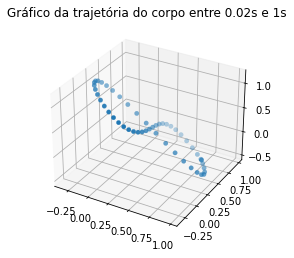

In [9]:
#plot do gráfico que mostra a trajetória da particula 
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x_j, y_j, z_j, linewidth=0.2, antialiased=True)
plt.title('Gráfico da trajetória do corpo entre 0.02s e 1s')